In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys

sys.path.append("..")

from src.homework2.knn_classifier import KNNClassifier
from src.homework2.processing import MinMaxScaler, StandardScaler, MaxAbsScaler, MetricCalculator, train_test_split

In [42]:
spam_df = pd.read_csv("spam.csv")
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [43]:
y = spam_df["label"].values
X = spam_df.drop(columns=["label"]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 0.2, stratify=True)

In [44]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([1895, 1231]))
(array([0, 1]), array([474, 309]))
(array([0, 1]), array([419, 273]))


In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [81]:
def get_metrics_for_k(min_k, max_k, leaf_size, X_train, y_train, X_test, y_test):
    accuracy = []
    f1_score = []
    for k in range(min_k, max_k + 1):
        knn = KNNClassifier(k, leaf_size)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        metric_calculator = MetricCalculator(y_pred, y_test)
        accuracy.append(metric_calculator.calculate_accuracy())
        f1_score.append(metric_calculator.calculate_f1_score())
    print(f"Best accuracy: {max(accuracy)} for k = {accuracy.index(max(accuracy) + 1)}")
    print(f"Best f1-score: {max(f1_score)} for k = {f1_score.index(max(f1_score)) + 1}")
    return accuracy, f1_score

In [88]:
def draw_dependence_metrics_on_k(accuracy, f1_score, file_name):
    k_values = np.arange(1, len(accuracy) + 1)
    plt.figure(figsize=(15, 8))

    plt.style.use("seaborn-whitegrid")
    plt.rcParams["font.size"] = 12

    ax = plt.gca()
    line1 = ax.plot(k_values, accuracy, marker="o", markersize=8, linewidth=2.5, color="#2c7bb6", label="Accuracy")
    line2 = ax.plot(k_values, f1_score, marker="s", markersize=8, linewidth=2.5, color="#d7191c", label="F1-score")

    plt.xticks(np.arange(1, len(accuracy) + 1, 5), fontsize=12)
    plt.yticks(np.arange(0.7, 1, 0.05), fontsize=12)
    plt.xlabel("Значение k", fontsize=14, labelpad=12)
    plt.ylabel("Метрика", fontsize=14, labelpad=12)
    plt.title("Зависимость Accuracy и F1-score от k", fontsize=16, pad=20, fontweight="bold")

    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True, fontsize=12)
    plt.grid(True, alpha=0.4, linestyle="--")

    ax.spines[["top", "right"]].set_visible(False)

    plt.savefig(file_name, dpi=300, bbox_inches="tight")

    plt.show()

In [51]:
spam_accuracy, spam_f1_score = get_metrics_for_k(1, 60, 60, X_train_scaled, y_train, X_val_scaled, y_val)

Best accuracy: 0.8901660280970626 for k = 56
Best f1-score: 0.8589743589743589 for k = 2


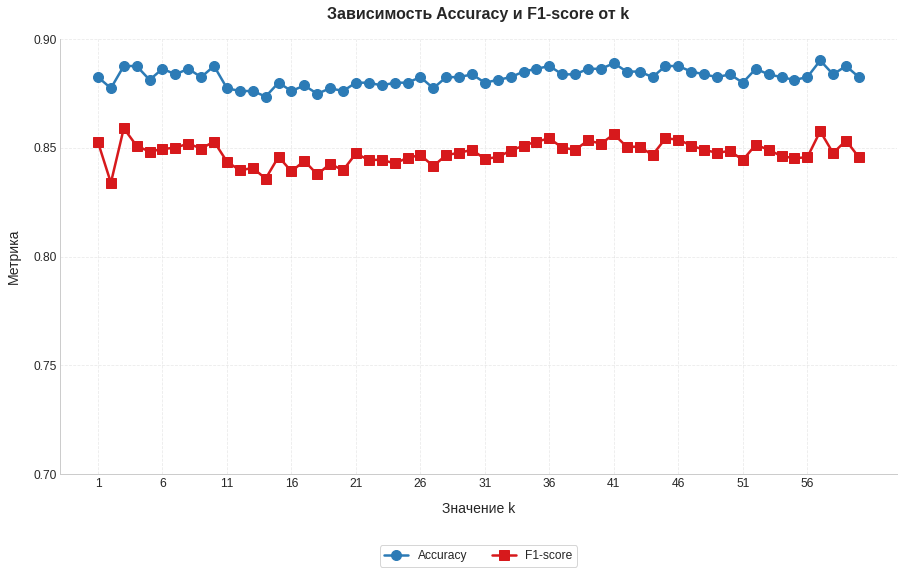

In [58]:
draw_dependence_metrics_on_k(spam_accuracy, spam_f1_score, "spam_result")

In [61]:
knn = KNNClassifier(56, 30)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
calculator = MetricCalculator(y_pred, y_test)
print(calculator.calculate_accuracy())
print(calculator.calculate_f1_score())

0.819364161849711
0.7680890538033396


In [64]:
cancer_df = pd.read_csv("cancer.csv")
cancer_df.head()

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
cancer_df["label"] = cancer_df["label"].map({"M": 1, "B": 0}).astype(int)

In [66]:
y = cancer_df["label"].values
X = cancer_df.drop(columns=["label"]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 0.2, stratify=True)

In [67]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([242, 142]))
(array([0, 1]), array([61, 37]))
(array([0, 1]), array([54, 33]))


In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [76]:
cancer_accuracy, cancer_f1_score = get_metrics_for_k(1, 60, 60, X_train_scaled, y_train, X_val_scaled, y_val)

Best accuracy: 0.9795918367346939 for k = 6
Best f1-score: 0.9722222222222222 for k = 6


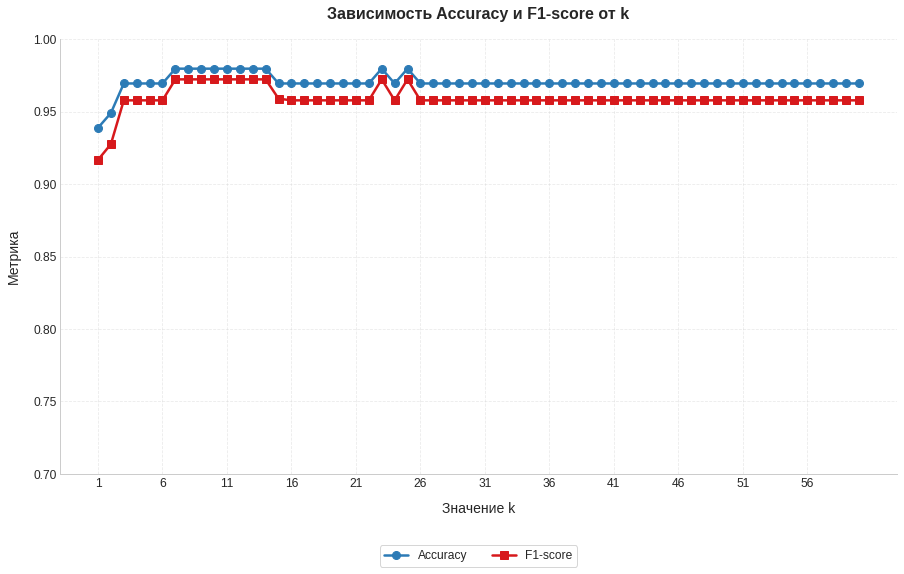

In [89]:
draw_dependence_metrics_on_k(cancer_accuracy, cancer_f1_score, "cancer_result")

In [78]:
knn = KNNClassifier(6, 30)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
calculator = MetricCalculator(y_pred, y_test)
print(calculator.calculate_accuracy())
print(calculator.calculate_f1_score())

0.9885057471264368
0.9850746268656716
